In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob 
import os

In [19]:
images_fp='./Pets'

In [20]:
image_names=[os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]

In [21]:
labels=[''.join(name.split('_')[:-1:]) for name in image_names]

In [22]:
def label_encode(label):
    if label == 'cat': return 1
    elif label == 'dog': return 2
    else: return 0

In [23]:
import tensorflow as tf
#from keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [24]:
features  =[]

labels =[]

IMAGE_SIZE=(224,224)

for name in image_names:

    label=''.join(name.split('_')[:-1:])

    label_encoded=label_encode(label)

    if label_encoded != None:

        img=load_img(os.path.join(images_fp, name))

        img=tf.image.resize_with_pad(img_to_array(img, dtype='uint8'),*IMAGE_SIZE).numpy().astype('uint8')

        image=np.array(img)

        features.append(image)

        labels.append(label_encoded)

In [25]:
features_array=np.array(features)
labels_array=np.array(labels)

In [26]:
labels_one_hot=pd.get_dummies(labels_array)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Train-60%+val=20% and test: 20%
X_train,X_test,Y_train,Y_test=train_test_split(features_array,labels_one_hot,test_size=0.2, random_state= 42)

In [29]:
#80%
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.25,random_state=1)

In [30]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [47]:
data_arugmentation=Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])

prediction_layers = Dense(2, activation='softmax')

In [48]:
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')

resnet_model.trainable=False

preprocess_input = pp_i


In [49]:
#Build model
inputs=Input(shape=(224,224,3))
x=data_arugmentation(inputs)
x=preprocess_input(x)
x=resnet_model(x,training=False)
x=Dropout(0.2)(x)
outputs=prediction_layers(x) 
model=Model(inputs, outputs)


In [50]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])


In [51]:
model_history=model.fit(x=X_train,y=Y_train,validation_data=(X_val,Y_val),epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 0.3901 - loss: 1.2620 - val_accuracy: 0.7500 - val_loss: 0.4899
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6298 - loss: 0.7431 - val_accuracy: 0.8214 - val_loss: 0.3867
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7068 - loss: 0.5121 - val_accuracy: 0.8571 - val_loss: 0.3408
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7894 - loss: 0.4363 - val_accuracy: 0.7857 - val_loss: 0.4107
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7993 - loss: 0.4061 - val_accuracy: 0.7857 - val_loss: 0.3658
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8899 - loss: 0.2801 - val_accuracy: 0.8929 - val_loss: 0.2985
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8798 - loss: 0.2491 - val_accuracy: 0.8929 - val_loss: 0.2889
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8800 - loss: 0.2745 - val_accuracy: 0.7857 - val_loss: 0.3302
Epoch 9/

In [53]:
acc=model_history.history ['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history. history['loss']
val_loss=model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

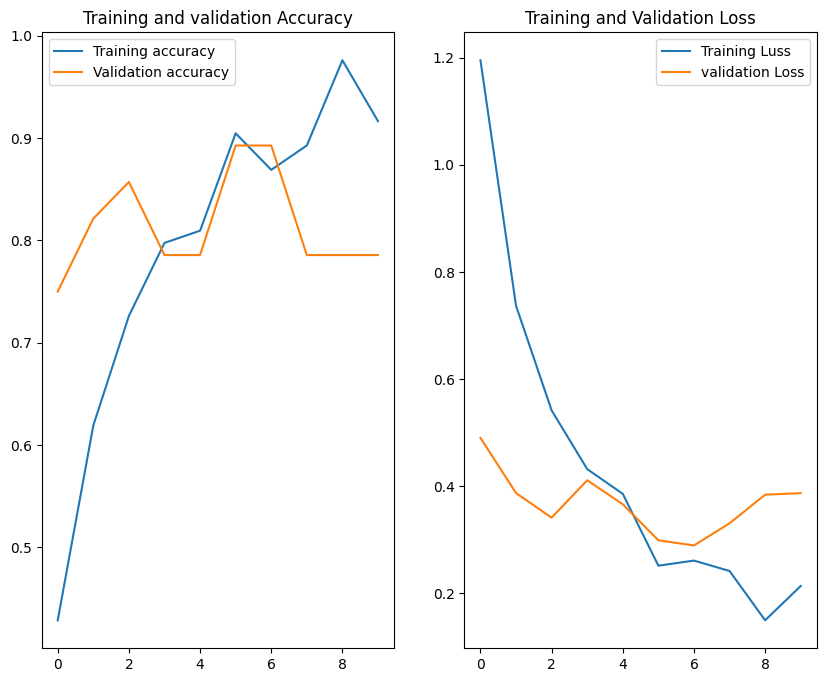

In [80]:
epochs_range=range(10)
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend(loc='best')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Luss')
plt.plot(epochs_range,val_loss, label='validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')

In [81]:
model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9286 - loss: 0.1653


[0.16533803939819336, 0.9285714030265808]

In [82]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [83]:
y_pred

array([[0.03615303, 0.963847  ],
       [0.98837006, 0.0116299 ],
       [0.9948413 , 0.00515873],
       [0.15449299, 0.84550697],
       [0.9569808 , 0.04301916],
       [0.9702932 , 0.02970676],
       [0.06169452, 0.9383055 ],
       [0.9741329 , 0.02586707],
       [0.018003  , 0.98199695],
       [0.17207588, 0.8279241 ],
       [0.07672768, 0.9232724 ],
       [0.9757422 , 0.02425775],
       [0.21072684, 0.78927314],
       [0.7297946 , 0.27020538],
       [0.03397755, 0.9660225 ],
       [0.00778606, 0.9922139 ],
       [0.9888986 , 0.01110141],
       [0.5326392 , 0.46736082],
       [0.03766195, 0.96233803],
       [0.11723533, 0.88276464],
       [0.99636614, 0.00363383],
       [0.0198033 , 0.9801967 ],
       [0.49356768, 0.5064323 ],
       [0.9883896 , 0.01161038],
       [0.01801633, 0.98198366],
       [0.72892207, 0.27107793],
       [0.02362899, 0.97637105],
       [0.10784979, 0.89215016]], dtype=float32)